   Tree Size  BFS Time  DFS Time
0       1000  0.005955       0.0
1      40000  0.040922       0.0
2      80000  0.172507       0.0
3     200000  0.045877       0.0
4    1000000  0.040892       0.0


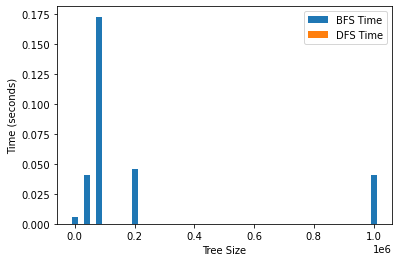

In [9]:
import random
import queue
import time
import pandas as pd
import matplotlib.pyplot as plt


class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def __str__(self):
        return str(self.value)


def build_bst(lst):
    root = None
    for value in lst:
        if root is None:
            root = Node(value)
        else:
            current = root
            while True:
                if value < current.value:
                    if current.left is None:
                        current.left = Node(value)
                        break
                    else:
                        current = current.left
                else:
                    if current.right is None:
                        current.right = Node(value)
                        break
                    else:
                        current = current.right
    return root


def bfs(root, goal):
    start_time = time.time()
    q = queue.Queue()
    q.put(root)
    while not q.empty():
        node = q.get()
        if node.value == goal:
            end_time = time.time()
            return end_time - start_time
        if node.left is not None:
            q.put(node.left)
        if node.right is not None:
            q.put(node.right)
    end_time = time.time()
    return end_time - start_time


def dfs(root, goal):
    start_time = time.time()
    stack = [root]
    while stack:
        node = stack.pop()
        if node.value == goal:
            end_time = time.time()
            return end_time - start_time
        if node.right is not None:
            stack.append(node.right)
        if node.left is not None:
            stack.append(node.left)
    end_time = time.time()
    return end_time - start_time


set1 = random.sample(range(1, 1001), 1000)
set2 = random.sample(range(1, 40001), 40000)
set3 = random.sample(range(1, 80001), 80000)
set4 = random.sample(range(1, 200001), 200000)
set5 = random.sample(range(1, 1000001), 1000000)

bst1 = build_bst(set1)
bst2 = build_bst(set2)
bst3 = build_bst(set3)
bst4 = build_bst(set4)
bst5 = build_bst(set5)

total_len1 = len(set1)
total_len2 = len(set2)
total_len3 = len(set3)
total_len4 = len(set4)
total_len5 = len(set5)

goal_idx = total_len1 - 220

bfs_times = []
dfs_times = []

for bst in [bst1, bst2, bst3, bst4, bst5]:
    bfs_time = bfs(bst, 69)
    bfs_times.append(bfs_time)
    dfs_time = dfs(bst, 69)
    dfs_times.append(dfs_time)

df = pd.DataFrame({
    'Tree Size': [total_len1, total_len2, total_len3, total_len4, total_len5],
    'BFS Time': bfs_times,
    'DFS Time': dfs_times
})

print(df)

plt.bar(df['Tree Size'], df['BFS Time'], width=20000, align='center')
plt.bar(df['Tree Size'], df['DFS Time'], width=10000, align='center')
plt.legend(['BFS Time', 'DFS Time'])
plt.xlabel('Tree Size')
plt.ylabel('Time (seconds)')

plt.show()
